In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl  
mpl.rc('font',family='Latin Modern Sans')


In [6]:
import numpy as np

def bootstrap_ci(data, n_resamples=10000, ci=90, random_seed=None):
    """
    Compute bootstrap confidence intervals along axis 0 for a 2D array.

    Parameters:
        data (np.ndarray): Array of shape (a, b)
        n_resamples (int): Number of bootstrap resamples
        ci (float): Confidence level (e.g., 90 for 90%)
        random_seed (int or None): Optional random seed for reproducibility

    Returns:
        mean (np.ndarray): Mean along axis 0 → shape (b,)
        lower (np.ndarray): Lower bound of confidence interval → shape (b,)
        upper (np.ndarray): Upper bound of confidence interval → shape (b,)
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    a, b = data.shape
    means = np.zeros((n_resamples, b))
    
    for i in range(n_resamples):
        indices = np.random.randint(0, a, size=a)
        sample = data[indices, :]  # resample rows (axis 0)
        means[i] = sample.mean(axis=0)

    alpha = (100 - ci) / 2
    lower = np.percentile(means, alpha, axis=0)
    upper = np.percentile(means, 100 - alpha, axis=0)
    mean = data.mean(axis=0)

    return mean, lower, upper


In [7]:
folder_save = "/Users/mnaegel/Documents/RL_opt/Figures_rlopt/"
font = {"fontname": "Latin Modern Sans", "fontsize":10}
font_legend = {"size": 7}
blue = "#00A2FF"
orange="#F27200"
green="#1DB100"
red="#EE220C"

In [9]:
to_add = "maxppo_obs"
save_path= "eval_results/eval_results_big_exp_2"
with open(save_path + f"episode_rewards_all_{to_add}.pkl", "rb") as f:
    episode_rewards_all_max_obs = np.array(pickle.load(f))

with open(save_path + f"episode_lengths_all_{to_add}.pkl", "rb") as f:
    episode_lengths_all_max_obs = np.array(pickle.load(f))

with open(save_path + f"episode_rewards_not_adapted_all_{to_add}.pkl", "rb") as f:
    episode_rewards_not_adapted_all_max_obs = np.array(pickle.load(f))

with open(save_path + f"episode_neg_min_vel_all_{to_add}.pkl", "rb") as f:
    episode_neg_min_vel_all_max_obs = np.array(pickle.load(f))

with open(save_path + f"episode_init_vel_all_{to_add}.pkl", "rb") as f:
    episode_init_vel_all_max_obs = np.array(pickle.load(f))

with open(save_path + f"episode_sucess_all_{to_add}.pkl", "rb") as f:
    episode_sucess_all_max_obs = np.array(pickle.load(f))

with open(save_path + f"n_cuttoff_all_{to_add}.pkl", "rb") as f:
    n_cuttoff_all_max_obs = np.array(pickle.load(f))

In [10]:
to_add = "ppo_last_step"
save_path= "eval_results/eval_results_big_exp2"

with open(save_path + f"episode_rewards_all_{to_add}.pkl", "rb") as f:
    episode_rewards_all_ppo_last_step = np.array(pickle.load(f))

with open(save_path + f"episode_lengths_all_{to_add}.pkl", "rb") as f:
    episode_lengths_all_ppo_last_step = np.array(pickle.load(f))

with open(save_path + f"episode_rewards_not_adapted_all_{to_add}.pkl", "rb") as f:
    episode_rewards_not_adapted_all_ppo_last_step = np.array(pickle.load(f))

with open(save_path + f"episode_neg_min_vel_all_{to_add}.pkl", "rb") as f:
    episode_neg_min_vel_all_ppo_last_step = np.array(pickle.load(f))

with open(save_path + f"episode_init_vel_all_{to_add}.pkl", "rb") as f:
    episode_init_vel_all_ppo_last_steps = np.array(pickle.load(f))

with open(save_path + f"episode_sucess_all_{to_add}.pkl", "rb") as f:
    episode_sucess_all_ppo_last_step = np.array(pickle.load(f))

with open(save_path + f"n_cuttoff_all_{to_add}.pkl", "rb") as f:
    n_cuttoff_all_ppo_last_step = np.array(pickle.load(f))

In [11]:
to_add = "ppo_add_obs_laststep"
save_path= "eval_results/eval_results_big_exp2"

with open(save_path + f"episode_rewards_all_{to_add}.pkl", "rb") as f:
    episode_rewards_all_ppo_add_obs_laststep = np.array(pickle.load(f))

with open(save_path + f"episode_lengths_all_{to_add}.pkl", "rb") as f:
    episode_lengths_all_ppo_add_obs_laststep = np.array(pickle.load(f))

with open(save_path + f"episode_rewards_not_adapted_all_{to_add}.pkl", "rb") as f:
    episode_rewards_not_adapted_all_ppo_add_obs_laststep = np.array(pickle.load(f))

with open(save_path + f"episode_neg_min_vel_all_{to_add}.pkl", "rb") as f:
    episode_neg_min_vel_all_ppo_add_obs_laststep = np.array(pickle.load(f))

with open(save_path + f"episode_init_vel_all_{to_add}.pkl", "rb") as f:
    episode_init_vel_all_ppo_add_obs_laststep = np.array(pickle.load(f))

with open(save_path + f"episode_sucess_all_{to_add}.pkl", "rb") as f:
    episode_sucess_all_ppo_add_obs_laststep = np.array(pickle.load(f))

with open(save_path + f"n_cuttoff_all_{to_add}.pkl", "rb") as f:
    n_cuttoff_all_ppo_add_obs_laststep = np.array(pickle.load(f))

In [12]:
n_max = 14
n_normal = 15

coeff_list = [12.5, 25, 50, 75, 100, 150, 200, 300, 400, 600, 800, 1200, 1600, 2400]

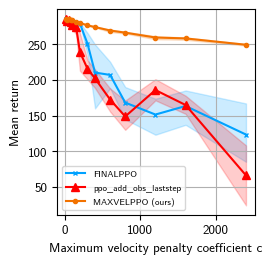

In [14]:
plt.figure(figsize=(2.75, 2.75))

min_reward = 0.

# last_step
for i in range(episode_rewards_all_ppo_last_step.shape[0]):
    for j in range(episode_rewards_all_ppo_last_step.shape[1]):
        episode_rewards_not_adapted_all_ppo_last_step[i, j, episode_rewards_all_ppo_last_step.shape[2] - n_cuttoff_all_ppo_last_step[i, j]:] = min_reward

mean_episode_rewards_all_ppo_last_step = np.mean(np.clip(episode_rewards_not_adapted_all_ppo_last_step, min_reward, None), axis=-1)
mean, lower, upper = bootstrap_ci(mean_episode_rewards_all_ppo_last_step, n_resamples=10000, ci=95)
plt.plot(coeff_list, mean, marker="x", label="FINALPPO", markersize=3, color=blue)
plt.fill_between(coeff_list, lower, upper, color=blue, alpha=0.2)

# # last step add obs

for i in range(episode_rewards_all_ppo_add_obs_laststep.shape[0]):
    for j in range(episode_rewards_all_ppo_add_obs_laststep.shape[1]):
        episode_rewards_not_adapted_all_ppo_add_obs_laststep[i, j, episode_rewards_all_ppo_add_obs_laststep.shape[2] - n_cuttoff_all_ppo_add_obs_laststep[i, j]:] = min_reward
mean_episode_rewards_all_ppo_add_obs_laststep = np.mean(np.clip(episode_rewards_not_adapted_all_ppo_add_obs_laststep, min_reward, None), axis=-1)
mean, lower, upper = bootstrap_ci(mean_episode_rewards_all_ppo_add_obs_laststep, n_resamples=10000, ci=95)
plt.plot(coeff_list, mean, label="ppo_add_obs_laststep", color="red", marker="^")
plt.fill_between(coeff_list, lower, upper, color="red", alpha=0.2)

# max_obs
for i in range(episode_rewards_all_max_obs.shape[0]):
    for j in range(episode_rewards_all_max_obs.shape[1]):
        episode_rewards_not_adapted_all_max_obs[i, j, episode_rewards_all_max_obs.shape[2] - n_cuttoff_all_max_obs[i, j]:] = min_reward
# calculate mean over all episodes
mean_episode_rewards_all_max_obs = np.mean(np.clip(episode_rewards_not_adapted_all_max_obs, min_reward, None), axis=-1)
mean, lower, upper = bootstrap_ci(mean_episode_rewards_all_max_obs, n_resamples=10000, ci=95)
plt.plot(coeff_list, mean, marker="o", label="MAXVELPPO (ours)", markersize=3, color=orange,)
plt.fill_between(coeff_list, lower, upper, color=orange, alpha=0.2)

plt.grid()
plt.legend(prop=font_legend)
plt.xlabel("Maximum velocity penalty coefficient c", **font)
plt.ylabel("Mean return", **font)
#plt.title("Lunar lander", **font)
plt.tight_layout()
plt.savefig(folder_save + "lunar_lander_bootstrap.pdf", bbox_inches='tight', transparent=True)